# 실습2 금융 상품 이탈률 예측 (Customer Churn Prediction)

금융상품 이탈률 예측(Customer Churn Prediction)을 위한 실습 코드를 준비했습니다. Kaggle에서 찾은 적절한 데이터셋은 "Credit Card Customers" 입니다.

데이터셋 링크: https://www.kaggle.com/sakshigoyal7/credit-card-customers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# 데이터 로드
data = pd.read_csv('BankChurners.csv')

# 필요한 열 선택
data = data[['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Attrition_Flag']]

# 카테고리형 변수를 숫자로 매핑
data['Gender'] = data['Gender'].map({'M': 0, 'F': 1})
data['Education_Level'] = data['Education_Level'].map({'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6})
data['Marital_Status'] = data['Marital_Status'].map({'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3})
data['Income_Category'] = data['Income_Category'].map({'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5})
data['Card_Category'] = data['Card_Category'].map({'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3})

# Attrition_Flag 열을 매핑해보세요 'Existing Customer'-> 0, 'Attrited Customer' -> 1
data['Attrition_Flag'] = data['Attrition_Flag'].map({'Existing Customer' : 0, 'Attrited Customer' : 1})


# 위 모든 feature를 사용해서, Attrition_Flag 예측
X = data[['Customer_Age',	'Gender',	'Dependent_count',	'Education_Level',	'Marital_Status',	'Income_Category',	'Card_Category',	'Months_on_book',	'Total_Relationship_Count',	'Months_Inactive_12_mon',	'Contacts_Count_12_mon',	'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt',	'Total_Trans_Ct'	,'Total_Ct_Chng_Q4_Q1',	'Avg_Utilization_Ratio']].to_numpy()
y = data['Attrition_Flag'].to_numpy()

data

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,45,0,3,2,2,3,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,1,5,4,1,1,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,0,3,4,2,4,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,1,4,2,0,1,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,0,3,1,2,3,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,0,2,4,1,2,0,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0
10123,41,0,2,0,3,2,0,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,1
10124,44,1,1,2,2,1,0,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,1
10125,30,0,2,4,0,2,0,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,1


In [ ]:
# 학습 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

# Random Forest 모델 생성 및 학습
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# 예측
print(X_test)
print(rf.predict(X_test))
y_pred = rf.predict(X_test)
# 결과 평가(report확인, confusion martrix 확인)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[52.     1.     3.    ... 79.     0.756  0.   ]
 [32.     0.     0.    ... 67.     0.763  0.522]
 [43.     0.     1.    ... 75.     0.667  0.274]
 ...
 [44.     0.     4.    ... 83.     0.729  0.197]
 [49.     1.     4.    ... 74.     0.644  0.255]
 [52.     1.     2.    ... 80.     0.86   0.629]]
[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1709
           1       0.92      0.82      0.87       317

    accuracy                           0.96      2026
   macro avg       0.94      0.90      0.92      2026
weighted avg       0.96      0.96      0.96      2026

[[1686   23]
 [  56  261]]


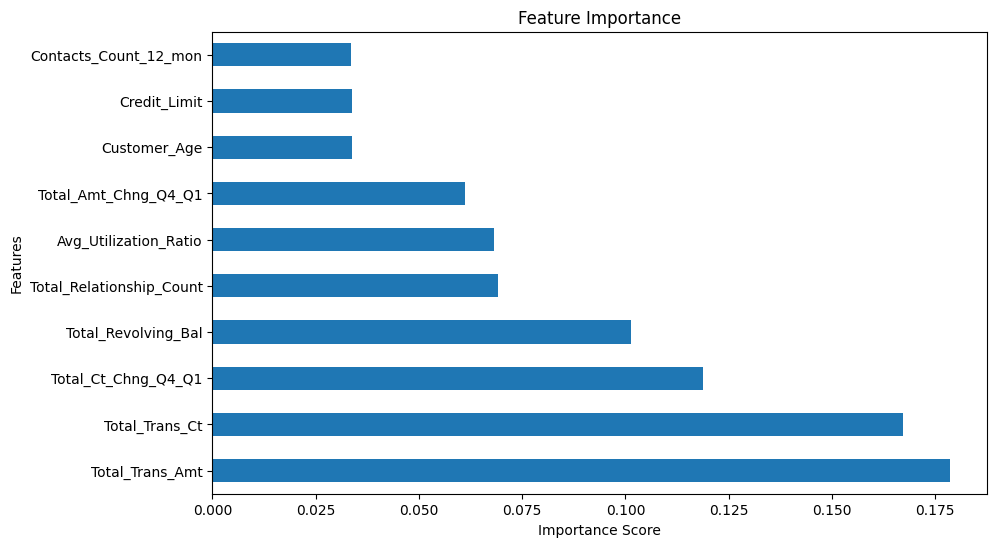

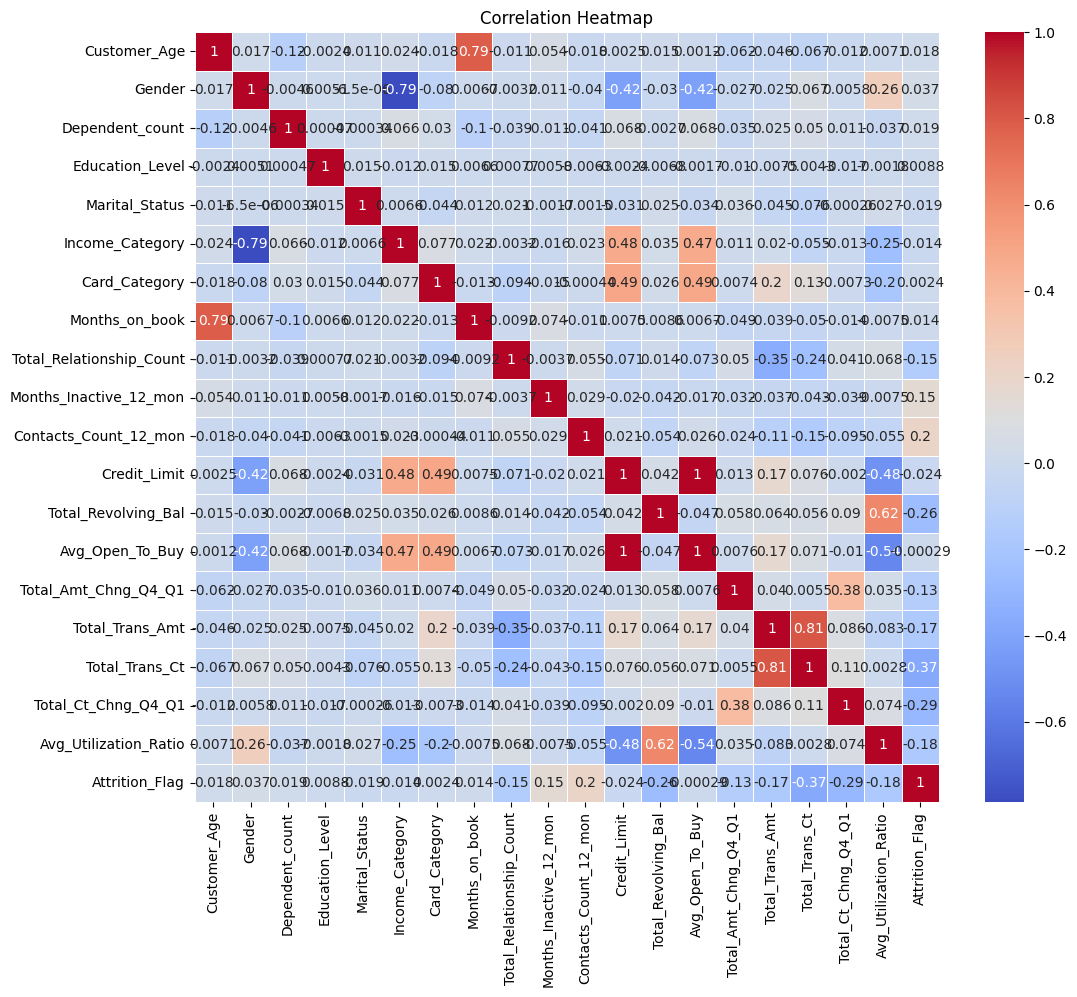

In [ ]:
# Feature Importance 시각화
feat_importances = pd.Series(rf.feature_importances_, index=data[['Customer_Age',	'Gender',	'Dependent_count',	'Education_Level',	'Marital_Status',	'Income_Category',	'Card_Category',	'Months_on_book',	'Total_Relationship_Count',	'Months_Inactive_12_mon',	'Contacts_Count_12_mon',	'Credit_Limit',	'Total_Revolving_Bal',	'Avg_Open_To_Buy',	'Total_Amt_Chng_Q4_Q1',	'Total_Trans_Amt',	'Total_Trans_Ct'	,'Total_Ct_Chng_Q4_Q1',	'Avg_Utilization_Ratio']].columns)
feat_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 최소 2가지 이상의 분류모델을 추가로 적용하여 가장 성능이 높은 모델을 고르세요.

In [ ]:
# 모델1 학습
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
# 예측
print(X_test)
print(dt.predict(X_test))

# 평가
y_pred = dt.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[52.     1.     3.    ... 79.     0.756  0.   ]
 [32.     0.     0.    ... 67.     0.763  0.522]
 [43.     0.     1.    ... 75.     0.667  0.274]
 ...
 [44.     0.     4.    ... 83.     0.729  0.197]
 [49.     1.     4.    ... 74.     0.644  0.255]
 [52.     1.     2.    ... 80.     0.86   0.629]]
[0 1 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1709
           1       0.80      0.80      0.80       317

    accuracy                           0.94      2026
   macro avg       0.88      0.88      0.88      2026
weighted avg       0.94      0.94      0.94      2026

[[1644   65]
 [  64  253]]


In [ ]:
# 모델2 학습
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
# 예측
print(X_test)
print(lr.predict(X_test))

# 평가
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

[[52.     1.     3.    ... 79.     0.756  0.   ]
 [32.     0.     0.    ... 67.     0.763  0.522]
 [43.     0.     1.    ... 75.     0.667  0.274]
 ...
 [44.     0.     4.    ... 83.     0.729  0.197]
 [49.     1.     4.    ... 74.     0.644  0.255]
 [52.     1.     2.    ... 80.     0.86   0.629]]
[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1709
           1       0.65      0.40      0.50       317

    accuracy                           0.87      2026
   macro avg       0.77      0.68      0.71      2026
weighted avg       0.86      0.87      0.86      2026

[[1640   69]
 [ 189  128]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
